# ✅ RESUELTO — K Vecinos más Cercanos (KNN) en Wine

**Objetivo:** clasificar el **tipo de vino** (3 clases) a partir de 13 características químicas.  
**Dataset:** `sklearn.datasets.load_wine`.

**Aprenderás a:**
- Escalar datos (imprescindible en KNN).
- Probar diferentes `k` y comparar resultados.
- Evaluar con `accuracy`, `classification_report` y `matriz de confusión`.

## Paso 0 — Imports y configuración

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

np.random.seed(42)

## Paso 1 — Carga, split y escalado

In [2]:
data = load_wine()
X, y = data.data, data.target
target_names = data.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

X_train_s.shape, X_test_s.shape

((142, 13), (36, 13))

## Paso 2 — Entrenamiento con distintos k (3, 7, 15)

In [ ]:
ks = [3, 7, 15]
models = {}
for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_s, y_train)
    models[k] = clf

for k, clf in models.items():
    y_pred = clf.predict(X_test_s)
    acc = accuracy_score(y_test, y_pred)
    print(f"k={k:>2} -> Accuracy test: {acc:.3f}")

k= 3 -> Accuracy test: 0.972
k= 7 -> Accuracy test: 1.000
k=15 -> Accuracy test: 1.000


## Paso 3 — Matrices de confusión e informe de clasificación


=== KNN (k=3) ===
              precision    recall  f1-score   support

     class_0      0.923     1.000     0.960        12
     class_1      1.000     0.929     0.963        14
     class_2      1.000     1.000     1.000        10

    accuracy                          0.972        36
   macro avg      0.974     0.976     0.974        36
weighted avg      0.974     0.972     0.972        36



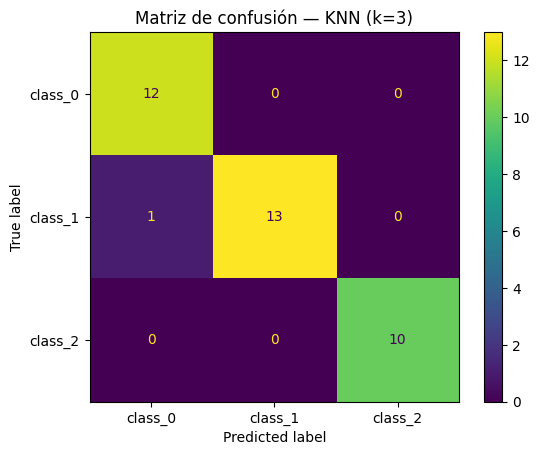


=== KNN (k=7) ===
              precision    recall  f1-score   support

     class_0      1.000     1.000     1.000        12
     class_1      1.000     1.000     1.000        14
     class_2      1.000     1.000     1.000        10

    accuracy                          1.000        36
   macro avg      1.000     1.000     1.000        36
weighted avg      1.000     1.000     1.000        36



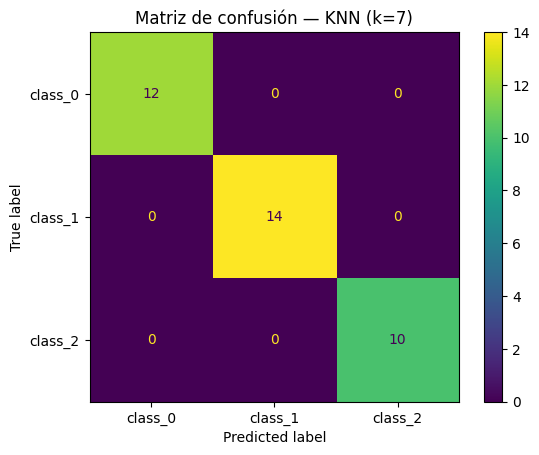


=== KNN (k=15) ===
              precision    recall  f1-score   support

     class_0      1.000     1.000     1.000        12
     class_1      1.000     1.000     1.000        14
     class_2      1.000     1.000     1.000        10

    accuracy                          1.000        36
   macro avg      1.000     1.000     1.000        36
weighted avg      1.000     1.000     1.000        36



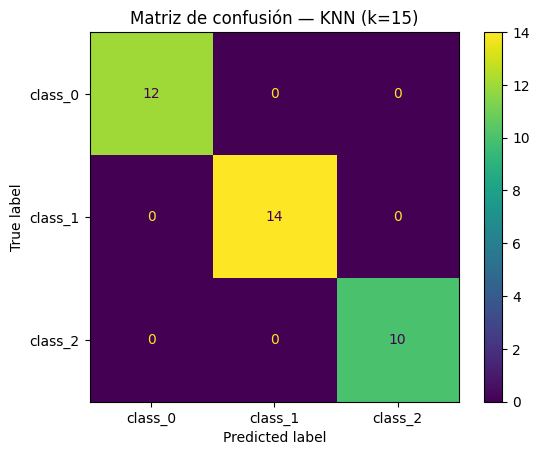

In [11]:
for k, clf in models.items():
    y_pred = clf.predict(X_test_s)
    print(f"\n=== KNN (k={k}) ===")
    print(classification_report(y_test, y_pred, target_names=target_names, digits=3))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot()
    plt.title(f"Matriz de confusión — KNN (k={k})")
    plt.show()

## Paso 4 — Curva simple de validación (accuracy vs k)

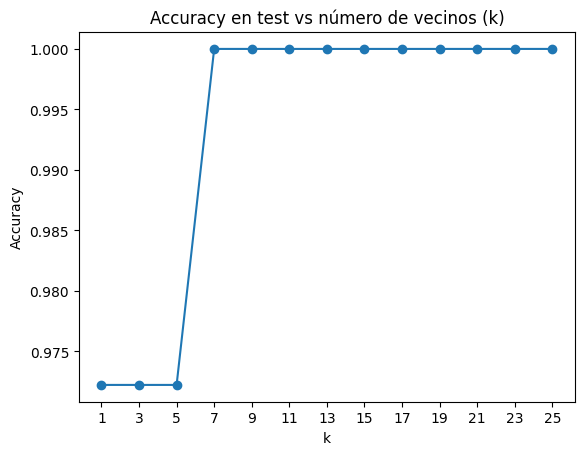

In [5]:
accs = []
ks_range = list(range(1, 26, 2))
for k in ks_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_s, y_train)
    accs.append(accuracy_score(y_test, clf.predict(X_test_s)))

plt.figure()
plt.plot(ks_range, accs, marker='o')
plt.title("Accuracy en test vs número de vecinos (k)")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.xticks(ks_range)
plt.show()

## Conclusión didáctica
- **Escalar** es clave para KNN.  
- `k` pequeño → más flexible pero sensible al ruido; `k` grande → más suave pero puede **subajustar**.  
- Selecciona `k` por validación y documenta tu elección.